In [1]:
from src.api.tradier import TradierAPI
from src.api.polygon import PolygonAPI
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import numpy as np
import time

In [3]:
data = [{'symbol': 'CHNG201120P00010000', 'description': 'CHNG Nov 20 2020 $10.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.06, 'ask': 0.23, 'underlying': 'CHNG', 'strike': 10.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 70, 'bidexch': 'P', 'bid_date': 1600459197000, 'asksize': 26, 'askexch': 'Z', 'ask_date': 1600459197000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00010000', 'description': 'CHNG Nov 20 2020 $10.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 2.5, 'ask': 6.75, 'underlying': 'CHNG', 'strike': 10.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 40, 'bidexch': 'X', 'bid_date': 1600459089000, 'asksize': 48, 'askexch': 'B', 'ask_date': 1600459087000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00011000', 'description': 'CHNG Nov 20 2020 $11.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 4.25, 'underlying': 'CHNG', 'strike': 11.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'B', 'bid_date': 1600459107000, 'asksize': 267, 'askexch': 'X', 'ask_date': 1600459108000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00011000', 'description': 'CHNG Nov 20 2020 $11.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 1.0, 'ask': 5.3, 'underlying': 'CHNG', 'strike': 11.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 2, 'bidexch': 'P', 'bid_date': 1600459192000, 'asksize': 51, 'askexch': 'Z', 'ask_date': 1600459191000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00012000', 'description': 'CHNG Nov 20 2020 $12.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 0.79, 'underlying': 'CHNG', 'strike': 12.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'P', 'bid_date': 1600459167000, 'asksize': 172, 'askexch': 'B', 'ask_date': 1600459167000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00012000', 'description': 'CHNG Nov 20 2020 $12.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.7, 'ask': 4.75, 'underlying': 'CHNG', 'strike': 12.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 27, 'bidexch': 'X', 'bid_date': 1600459199000, 'asksize': 172, 'askexch': 'B', 'ask_date': 1600459078000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00013000', 'description': 'CHNG Nov 20 2020 $13.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 0.97, 'underlying': 'CHNG', 'strike': 13.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'Z', 'bid_date': 1600459136000, 'asksize': 58, 'askexch': 'A', 'ask_date': 1600459198000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00013000', 'description': 'CHNG Nov 20 2020 $13.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.01, 'ask': 2.67, 'underlying': 'CHNG', 'strike': 13.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 58, 'bidexch': 'Q', 'bid_date': 1600459139000, 'asksize': 108, 'askexch': 'X', 'ask_date': 1600459120000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00014000', 'description': 'CHNG Nov 20 2020 $14.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 4.3, 'underlying': 'CHNG', 'strike': 14.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'B', 'bid_date': 1600459018000, 'asksize': 82, 'askexch': 'A', 'ask_date': 1600459198000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00014000', 'description': 'CHNG Nov 20 2020 $14.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 4.4, 'underlying': 'CHNG', 'strike': 14.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'B', 'bid_date': 1600459191000, 'asksize': 339, 'askexch': 'X', 'ask_date': 1600459102000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00015000', 'description': 'CHNG Nov 20 2020 $15.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.03, 'ask': 4.2, 'underlying': 'CHNG', 'strike': 15.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 10, 'bidexch': 'M', 'bid_date': 1600459198000, 'asksize': 244, 'askexch': 'X', 'ask_date': 1600459185000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00015000', 'description': 'CHNG Nov 20 2020 $15.00 Call', 'exch': 'Z', 'type': 'option', 'last': 1.5, 'change': -0.01, 'volume': 10, 'open': 1.5, 'high': 1.5, 'low': 1.5, 'close': 1.5, 'bid': 0.0, 'ask': 4.15, 'underlying': 'CHNG', 'strike': 15.0, 'change_percentage': -0.67, 'average_volume': 0, 'last_volume': 10, 'trade_date': 1600438067261, 'prevclose': 1.51, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'D', 'bid_date': 1600459080000, 'asksize': 297, 'askexch': 'X', 'ask_date': 1600459086000, 'open_interest': 20, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00016000', 'description': 'CHNG Nov 20 2020 $16.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 1.1, 'underlying': 'CHNG', 'strike': 16.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'B', 'bid_date': 1600458994000, 'asksize': 58, 'askexch': 'A', 'ask_date': 1600459198000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00016000', 'description': 'CHNG Nov 20 2020 $16.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 2.32, 'underlying': 'CHNG', 'strike': 16.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'Q', 'bid_date': 1600459194000, 'asksize': 98, 'askexch': 'B', 'ask_date': 1600459152000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00017000', 'description': 'CHNG Nov 20 2020 $17.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 4.25, 'underlying': 'CHNG', 'strike': 17.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'Z', 'bid_date': 1600459191000, 'asksize': 243, 'askexch': 'X', 'ask_date': 1600459106000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00017000', 'description': 'CHNG Nov 20 2020 $17.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 4.2, 'underlying': 'CHNG', 'strike': 17.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'P', 'bid_date': 1600459159000, 'asksize': 57, 'askexch': 'M', 'ask_date': 1600459191000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00018000', 'description': 'CHNG Nov 20 2020 $18.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 1.0, 'ask': 5.3, 'underlying': 'CHNG', 'strike': 18.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 21, 'bidexch': 'X', 'bid_date': 1600459198000, 'asksize': 48, 'askexch': 'Z', 'ask_date': 1600459197000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00018000', 'description': 'CHNG Nov 20 2020 $18.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.01, 'ask': 4.3, 'underlying': 'CHNG', 'strike': 18.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 1, 'bidexch': 'W', 'bid_date': 1600459197000, 'asksize': 48, 'askexch': 'B', 'ask_date': 1600459197000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00019000', 'description': 'CHNG Nov 20 2020 $19.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 1.5, 'ask': 5.45, 'underlying': 'CHNG', 'strike': 19.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 1, 'bidexch': 'B', 'bid_date': 1600459191000, 'asksize': 58, 'askexch': 'Z', 'ask_date': 1600459199000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00019000', 'description': 'CHNG Nov 20 2020 $19.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 4.25, 'underlying': 'CHNG', 'strike': 19.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'B', 'bid_date': 1600459083000, 'asksize': 343, 'askexch': 'X', 'ask_date': 1600459102000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00020000', 'description': 'CHNG Nov 20 2020 $20.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 2.5, 'ask': 6.9, 'underlying': 'CHNG', 'strike': 20.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 2, 'bidexch': 'P', 'bid_date': 1600459192000, 'asksize': 52, 'askexch': 'B', 'ask_date': 1600459192000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00020000', 'description': 'CHNG Nov 20 2020 $20.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 0.48, 'underlying': 'CHNG', 'strike': 20.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'B', 'bid_date': 1600459032000, 'asksize': 210, 'askexch': 'X', 'ask_date': 1600459033000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}]

In [11]:
filt_chain = []
underlying = 14.73
for level in data:
    if level['option_type'] != 'put': continue
    if underlying <= level['strike']: continue
#     if not level['last']: continue
    filt_chain.append(level)
print(filt_chain)

[{'symbol': 'CHNG201120P00010000', 'description': 'CHNG Nov 20 2020 $10.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.06, 'ask': 0.23, 'underlying': 'CHNG', 'strike': 10.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 70, 'bidexch': 'P', 'bid_date': 1600459197000, 'asksize': 26, 'askexch': 'Z', 'ask_date': 1600459197000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00011000', 'description': 'CHNG Nov 20 2020 $11.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 4.25, 'underlying': 'CHNG', 'strike': 11.0, 'change_percentage': None, 'average_volum

In [ ]:
api = TradierAPI()
chain, _, _, _ = api.fetch_chain('TSLA', '2020-11-20', greeks=True)

In [3]:
api = PolygonAPI()
underlying = api.fetch_last_quote('TSLA')

In [4]:
strikes = np.array([l['strike'] for l in chain if l['option_type'] == 'put' and l['strike'] > underlying])
deltas = np.array([l['greeks']['delta'] for l in chain if l['option_type'] == 'put' and l['strike'] > underlying])

In [5]:
now = time.time()
coefs = poly.polyfit(strikes, deltas, 11)
ffit = poly.polyval(strikes, coefs)
then = time.time()
print('Total time: {}ms'.format((then - now) * 1000))

Total time: 0.6737709045410156ms


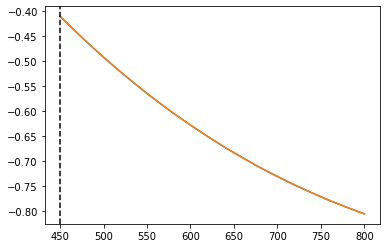

In [6]:
plt.plot(strikes, deltas)
plt.plot(strikes, ffit)
plt.axvline(x=underlying, color='k', linestyle='--')
plt.show()

In [7]:
print(poly.polyval(120.14351345, coefs))

65.45074776098727


In [8]:
data = {28.75: {'iv': 1.8025664518781135, 'delta': -0.0017229639806732716, 'theta': -0.005377622483133024, 'vega': 0.0016095195222112027, 'gamma': 0.00010563869241830975, 'rho': -0.00015837125442354726}, 30.0: {'iv': 1.676384648894698, 'delta': -0.0012805244568474365, 'theta': -0.0038149350200683257, 'vega': 0.0012277233304395566, 'gamma': 8.664527527658126e-05, 'rho': -0.00011600562488696006}, 31.25: {'iv': 1.5234024629727392, 'delta': -0.0007449766163877861, 'theta': -0.0021085385087034813, 'vega': 0.0007466915217206104, 'gamma': 5.798886640254963e-05, 'rho': -6.628011327659689e-05}, 32.5: {'iv': 1.4763316105056736, 'delta': -0.000769580513305691, 'theta': -0.0021055017675595364, 'vega': 0.0007693787503547559, 'gamma': 6.16558544490514e-05, 'rho': -6.822496403126451e-05}, 33.75: {'iv': 1.431080383680067, 'delta': -0.0007947006100846013, 'theta': -0.0021022588738464285, 'vega': 0.000792473358022045, 'gamma': 6.551469057514184e-05, 'rho': -7.021061855342442e-05}, 35.0: {'iv': 1.5416339574484055, 'delta': -0.0020288450371857315, 'theta': -0.005336045753160881, 'vega': 0.001867269188866917, 'gamma': 0.00014329918336733363, 'rho': -0.00018255006664917966}, 37.5: {'iv': 1.3049397413511417, 'delta': -0.0008735514421684998, 'theta': -0.002091369892053968, 'vega': 0.0008645376645745563, 'gamma': 7.838112872417502e-05, 'rho': -7.64434970602822e-05}, 38.75: {'iv': 1.2657284462637195, 'delta': -0.0009011372907702959, 'theta': -0.002087372506916451, 'vega': 0.0008896030036078345, 'gamma': 8.315220155266265e-05, 'rho': -7.862406051534645e-05}, 40.0: {'iv': 1.2277775996099791, 'delta': -0.0009294484004458771, 'theta': -0.002083198047201701, 'vega': 0.00091525216495908, 'gamma': 8.819401446722451e-05, 'rho': -8.086195328500646e-05}, 41.25: {'iv': 1.2710522343211903, 'delta': -0.0017030542970585636, 'theta': -0.0037526159549594864, 'vega': 0.001592580284194121, 'gamma': 0.0001482367855036183, 'rho': -0.00014940510958429102}, 42.5: {'iv': 1.2853724951749999, 'delta': -0.002443972754453234, 'theta': -0.005267045961993511, 'vega': 0.0022103795057775463, 'gamma': 0.00020344915713937359, 'rho': -0.00021536443979117085}, 43.75: {'iv': 1.1963966718668648, 'delta': -0.0018106321641714399, 'theta': -0.0037347897434182814, 'vega': 0.0016838632012958583, 'gamma': 0.00016651358151439737, 'rho': -0.00015790875828425652}, 45.0: {'iv': 1.1606608880708058, 'delta': -0.001866808745317755, 'theta': -0.003725366692332438, 'vega': 0.0017312976847795088, 'gamma': 0.0001764755120366674, 'rho': -0.00016234931770464482}, 46.25: {'iv': 1.1259043544271097, 'delta': -0.001924716294072916, 'theta': -0.003715604014014914, 'vega': 0.0017800325239873856, 'gamma': 0.00018704430563262395, 'rho': -0.0001669267039728938}, 47.5: {'iv': 1.0920717584794366, 'delta': -0.0019844682558861205, 'theta': -0.0037055003325444577, 'vega': 0.0018301527240108459, 'gamma': 0.00019826872265017346, 'rho': -0.0001716498845492492}, 48.75: {'iv': 1.059112145720341, 'delta': -0.0020461863103057787, 'theta': -0.0036950530241254627, 'vega': 0.001881748999694185, 'gamma': 0.00021020246161128274, 'rho': -0.00017652847777028263}, 50.0: {'iv': 1.1056275725961484, 'delta': -0.00369927596850113, 'theta': -0.006582174357378915, 'vega': 0.0032110349626242925, 'gamma': 0.00034360084703353094, 'rho': -0.00032198405993117145}, 51.25: {'iv': 1.0721268248011528, 'delta': -0.0038143644094504148, 'theta': -0.00656064720030613, 'vega': 0.003300470255392677, 'gamma': 0.0003642065173764045, 'rho': -0.0003310813928447583}, 52.5: {'iv': 0.965017879350719, 'delta': -0.002244497902222741, 'theta': -0.0036616048280052236, 'vega': 0.0020464015000698763, 'gamma': 0.0002508843308018048, 'rho': -0.0001922043054851356}, 53.75: {'iv': 1.0074637979856667, 'delta': -0.004057051878797716, 'theta': -0.006515465739365731, 'vega': 0.0034879616488286865, 'gamma': 0.0004096003358756009, 'rho': -0.0003502649762211395}, 55.0: {'iv': 0.9454042519856374, 'delta': -0.003322070445042313, 'theta': -0.0051106589253019545, 'vega': 0.002915409461220458, 'gamma': 0.00036483799457981024, 'rho': -0.0002847749466678856}, 56.25: {'iv': 0.877279244580195, 'delta': -0.0024658970760489136, 'theta': -0.0036248523713006114, 'vega': 0.0022283074353540593, 'gamma': 0.00030050749418136736, 'rho': -0.00020970512463323196}, 57.5: {'iv': 0.8866219227586463, 'delta': -0.0035385575717662566, 'theta': -0.005072874948458567, 'vega': 0.0030855549110630504, 'gamma': 0.0004117303356387591, 'rho': -0.00030188748592090614}, 58.75: {'iv': 0.9100793734737949, 'delta': -0.0054924829093133945, 'theta': -0.00771210322254651, 'vega': 0.004569922258187805, 'gamma': 0.000594083640098538, 'rho': -0.0004711230611442978}, 60.0: {'iv': 0.8807028266955442, 'delta': -0.0056714288122191505, 'theta': -0.0076789566833515436, 'vega': 0.004701923391042375, 'gamma': 0.000631632125842905, 'rho': -0.0004852680998539058}, 61.25: {'iv': 0.8518985952571119, 'delta': -0.0058582281423455495, 'theta': -0.007644750088298614, 'vega': 0.004839103752074416, 'gamma': 0.0006720399390540194, 'rho': -0.0005000339241206863}, 62.5: {'iv': 0.8019736508497828, 'delta': -0.005073019254597751, 'theta': -0.006333007243409463, 'vega': 0.004258147993780349, 'gamma': 0.0006281721876620039, 'rho': -0.00043057359254055857}, 63.75: {'iv': 0.8452148098282893, 'delta': -0.009024602851975249, 'theta': -0.011102035825728239, 'vega': 0.007082850634525085, 'gamma': 0.0009914231086058493, 'rho': -0.0007725016753257503}, 65.0: {'iv': 0.8022069134576537, 'delta': -0.008416739528718851, 'theta': -0.009912594451766048, 'vega': 0.0066627691997934845, 'gamma': 0.0009826218594771125, 'rho': -0.0007170598813817106}, 66.25: {'iv': 0.7883678385141502, 'delta': -0.009651598214431276, 'theta': -0.010982879242479694, 'vega': 0.0075115338383261255, 'gamma': 0.0011272436080264172, 'rho': -0.0008220634340956947}, 67.5: {'iv': 0.8055771816489002, 'delta': -0.01358905295697837, 'theta': -0.01510645130658409, 'vega': 0.010110952417863734, 'gamma': 0.0014849196787074367, 'rho': -0.0011628746810369067}, 68.75: {'iv': 0.7566534136454217, 'delta': -0.012261718216414945, 'theta': -0.012983017972844861, 'vega': 0.009251064241049736, 'gamma': 0.001446481066171068, 'rho': -0.001043168869309016}, 70.0: {'iv': 0.7579476522952678, 'delta': -0.015467236152536446, 'theta': -0.01588990495893492, 'vega': 0.011302775493901863, 'gamma': 0.001764265499399106, 'rho': -0.0013187307536848024}, 71.25: {'iv': 0.738356642969028, 'delta': -0.016935555704448067, 'theta': -0.016730480405313407, 'vega': 0.012215970932847358, 'gamma': 0.001957401227566058, 'rho': -0.0014421885595330736}, 72.5: {'iv': 0.7105441821596336, 'delta': -0.01756302530251051, 'theta': -0.01660933548417909, 'vega': 0.012601597032225152, 'gamma': 0.002098227391318102, 'rho': -0.001491787804945077}, 73.75: {'iv': 0.697867514518502, 'delta': -0.02010409198888531, 'theta': -0.01830140830298381, 'vega': 0.014137046215007346, 'gamma': 0.0023966452094663637, 'rho': -0.0017074348205664812}, 75.0: {'iv': 0.6898411291808773, 'delta': -0.023646051178320825, 'theta': -0.020749006782076203, 'vega': 0.0162135804847039, 'gamma': 0.002780660066921343, 'rho': -0.002009591192294915}, 76.25: {'iv': 0.6620790277563714, 'delta': -0.024573641234144208, 'theta': -0.020569420303396212, 'vega': 0.01674622599589508, 'gamma': 0.0029924380536888585, 'rho': -0.0020829138950403344}, 77.5: {'iv': 0.651246949657855, 'delta': -0.028374839078910315, 'theta': -0.022818013031133448, 'vega': 0.01888498182496393, 'gamma': 0.003430748809378769, 'rho': -0.0024055621626721323}, 78.75: {'iv': 0.6336026048284013, 'delta': -0.031404390730033885, 'theta': -0.024150019272089027, 'vega': 0.020542813555398803, 'gamma': 0.003835844761656674, 'rho': -0.002659822181571247}, 80.0: {'iv': 0.6239518720421946, 'delta': -0.036418658295890874, 'theta': -0.02686555353687444, 'vega': 0.023204991558565, 'gamma': 0.004399956419669239, 'rho': -0.0030857516615727747}, 81.25: {'iv': 0.6001166601401947, 'delta': -0.03891185540645437, 'theta': -0.027276534257031353, 'vega': 0.024493880973195797, 'gamma': 0.004828808379331951, 'rho': -0.003290222402080826}, 82.5: {'iv': 0.5911484850206373, 'delta': -0.04524996799546124, 'theta': -0.03036166319020778, 'vega': 0.02767622884265554, 'gamma': 0.005538961981759745, 'rho': -0.0038281894890397667}, 83.75: {'iv': 0.5797269546868687, 'delta': -0.051807151744776, 'theta': -0.03318024798702797, 'vega': 0.030839286183151647, 'gamma': 0.006293596212917404, 'rho': -0.004383473373938176}, 85.0: {'iv': 0.5692244079826592, 'delta': -0.0594976101159752, 'theta': -0.03634270720000534, 'vega': 0.0343993715384581, 'gamma': 0.007149654351389165, 'rho': -0.005035730951733759}, 86.25: {'iv': 0.5565049176822513, 'delta': -0.06750190693357294, 'theta': -0.03920153499469017, 'vega': 0.03795028019334882, 'gamma': 0.00806796550178773, 'rho': -0.005712796345191981}, 87.5: {'iv': 0.5443154356617307, 'delta': -0.07670990590645965, 'theta': -0.04229593521844895, 'vega': 0.041859144239069654, 'gamma': 0.009098247515133077, 'rho': -0.006492402478180197}, 88.75: {'iv': 0.530106972196795, 'delta': -0.08636418846164967, 'theta': -0.045048446362610885, 'vega': 0.045773541190456804, 'gamma': 0.010215721579702805, 'rho': -0.007307285744897863}, 90.0: {'iv': 0.5337020983400692, 'delta': -0.10402991626343687, 'theta': -0.05202163228999578, 'vega': 0.05249940642549421, 'gamma': 0.011637870896853064, 'rho': -0.0088293688829859}, 91.25: {'iv': 0.5218092197983428, 'delta': -0.11758931025311674, 'theta': -0.05553581539933604, 'vega': 0.057316803368184024, 'gamma': 0.01299535851056491, 'rho': -0.009982506772899625}, 92.5: {'iv': 0.5156194116417693, 'delta': -0.13509042507798524, 'theta': -0.06045510774181588, 'vega': 0.06313616998965813, 'gamma': 0.014486618595727148, 'rho': -0.01148418548423216}, 93.75: {'iv': 0.5105210667045174, 'delta': -0.15491512262817592, 'theta': -0.0656455696202318, 'vega': 0.06923373888378637, 'gamma': 0.016044351576971694, 'rho': -0.013191712230706991}, 95.0: {'iv': 0.5125439397798833, 'delta': -0.17954451530173074, 'theta': -0.07249044067725406, 'vega': 0.07614383206240961, 'gamma': 0.017576066171477597, 'rho': -0.015338171919147896}, 96.25: {'iv': 0.5075984550129797, 'delta': -0.20327225743756247, 'theta': -0.07747526310886545, 'vega': 0.08216221147650138, 'gamma': 0.01915004861819836, 'rho': -0.017398574621732135}, 97.5: {'iv': 0.5093577328000992, 'delta': -0.23133364441876847, 'theta': -0.08378222180378787, 'vega': 0.08853418484353194, 'gamma': 0.020563931164766697, 'rho': -0.019868067768124022}, 98.75: {'iv': 0.5067946488640713, 'delta': -0.2594453041310293, 'theta': -0.08867239994862207, 'vega': 0.09416268988974186, 'gamma': 0.021981882792257643, 'rho': -0.022341534795533927}, 100.0: {'iv': 0.5065016537166651, 'delta': -0.2897739390191721, 'theta': -0.09360036605807157, 'vega': 0.09943976244413785, 'gamma': 0.02322722156556939, 'rho': -0.025034599974527644}, 101.25: {'iv': 0.504173553242086, 'delta': -0.32082877559521783, 'theta': -0.09748873004657113, 'vega': 0.10403246737087454, 'gamma': 0.024412198375799044, 'rho': -0.027799853530306992}, 102.5: {'iv': 0.5017980926621765, 'delta': -0.35307072974349907, 'theta': -0.10072049498232258, 'vega': 0.10797132663631827, 'gamma': 0.02545642913661943, 'rho': -0.030688513938141693}, 103.75: {'iv': 0.4956848065852368, 'delta': -0.3858629506756849, 'theta': -0.10243755744399675, 'vega': 0.1111421301613914, 'gamma': 0.026527184691592508, 'rho': -0.033620670982851285}, 105.0: {'iv': 0.4974483126248908, 'delta': -0.4203196004489401, 'theta': -0.1050865543993071, 'vega': 0.11359246738754769, 'gamma': 0.02701591139881097, 'rho': -0.03678049583679376}, 106.25: {'iv': 0.49969314257553415, 'delta': -0.4547235483661868, 'theta': -0.10703383427383088, 'vega': 0.1151570142536184, 'gamma': 0.027264972176416716, 'rho': -0.039973116570963085}}

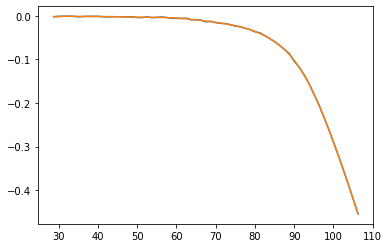

Error: 3.53314038632864e-05


In [52]:
fit_data = np.array([(k, v['delta']) for k, v in data.items()])
strikes, deltas = fit_data[:, 0], fit_data[:, 1]
coefs, stats = poly.polyfit(strikes, deltas, 15, full=True)
ffit = poly.polyval(strikes, coefs)
res, _, _, _ = stats
plt.plot(strikes, deltas)
plt.plot(strikes, ffit)
plt.show()
print('Error: {}'.format(res[0]))